In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('titanic.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.Age.isnull().sum()

177

In [5]:
data.Age.fillna(data.Age.median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<AxesSubplot:>

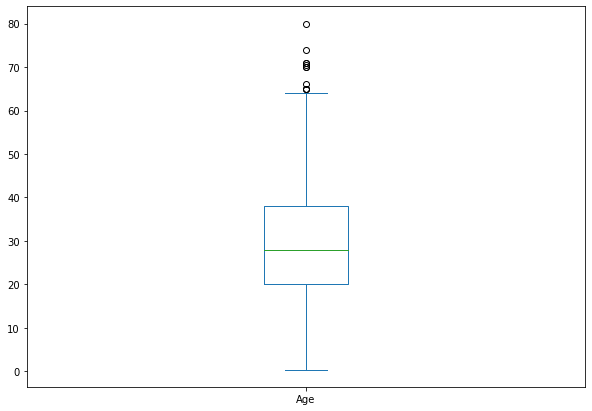

In [6]:
plt.figure(figsize=(10,7))
data.Age.plot(kind='box')

C:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

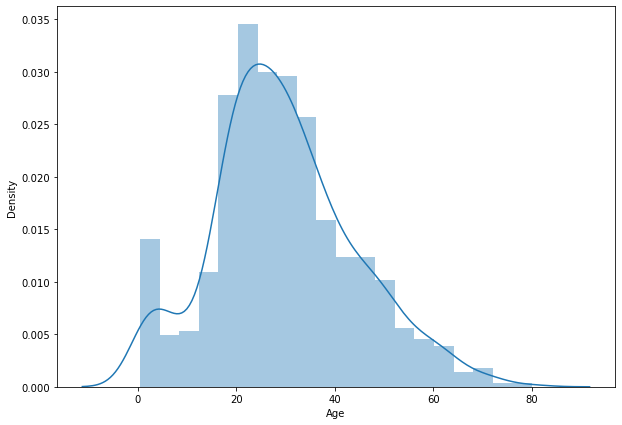

In [7]:
plt.figure(figsize=(10,7))
sns.distplot(data.Age)

<AxesSubplot:xlabel='Age', ylabel='Count'>

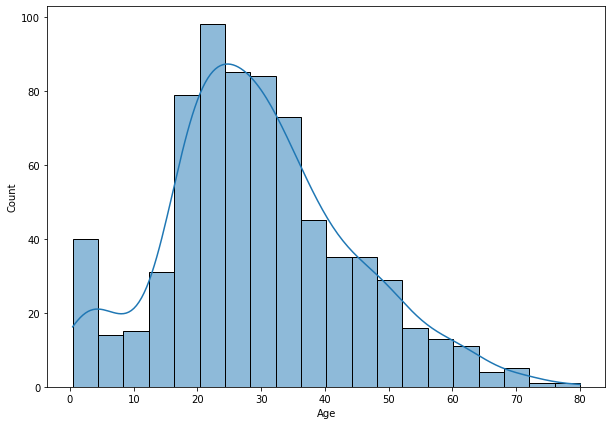

In [8]:
plt.figure(figsize=(10,7))
sns.histplot(data.Age, kde=True)

# If The Data Is Normally Distributed We use this
##### Assuming Age follows A Gaussian Distribution we will calculate the boundaries which differentiates the outliers

In [9]:
mean = data.Age.mean()
mean

29.69911764705882

In [10]:
std = data.Age.std()
std

14.526497332334044

In [11]:
upper_boundary = mean+3*std
upper_boundary

73.27860964406095

In [12]:
lower_boundary = mean-3*std
lower_boundary

-13.88037434994331

In [13]:
print('Upper boundary:', upper_boundary, '\nLower boundary:', lower_boundary)

Upper boundary: 73.27860964406095 
Lower boundary: -13.88037434994331


#### If Features Are Skewed We Use the below Technique

Text(0.5, 1.0, 'distribution of Fare feature')

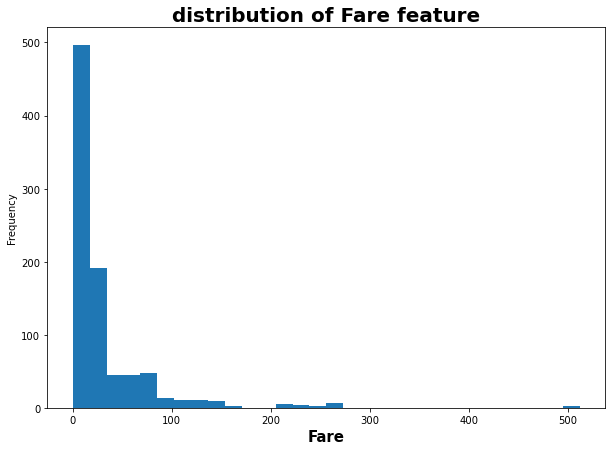

In [14]:
plt.figure(figsize=(10,7))
figure = data.Fare.plot.hist(bins=30)
figure.set_xlabel('Fare', fontsize=15, fontweight='bold')
figure.set_title('distribution of Fare feature', fontsize=20, fontweight='bold')


C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

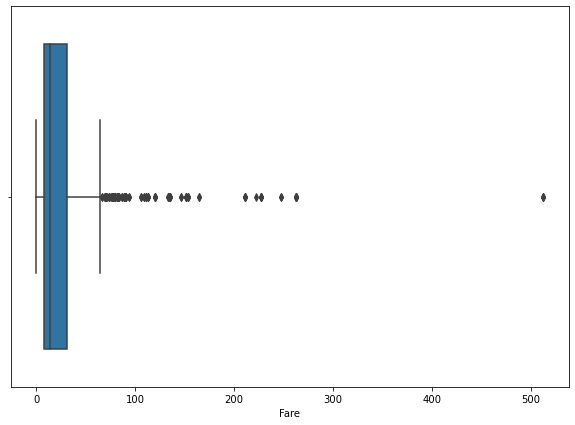

In [15]:
plt.figure(figsize=(10,7))
sns.boxplot(data['Fare'], orient='h')

In [16]:
data.Fare.quantile(0.25)

7.9104

In [17]:
data.Fare.quantile(0.75)

31.0

In [18]:
iqr = data.Fare.quantile(0.75) - data.Fare.quantile(0.25)
iqr

23.0896

In [19]:
lower_bridge = data.Fare.quantile(0.25) - 1.5*iqr
lower_bridge

-26.724

In [20]:
upper_bridge = data.Fare.quantile(0.75) + 1.5*iqr
upper_bridge

65.6344

# to find out the extreme outliers

In [21]:
lower_bridge_extreme = data.Fare.quantile(0.25) - 3*iqr
lower_bridge_extreme

-61.358399999999996

In [22]:
upper_bridge_extreme = data.Fare.quantile(0.75) + 3*iqr
upper_bridge_extreme

100.2688

In [23]:
print('upper bridge:', upper_bridge, '\nlower bridge:', lower_bridge, '\nextreme lower bridge:', lower_bridge_extreme, '\nextreme upper bridge:', upper_bridge_extreme)

upper bridge: 65.6344 
lower bridge: -26.724 
extreme lower bridge: -61.358399999999996 
extreme upper bridge: 100.2688


In [24]:
data.loc[data.Age.isnull(), 'Age'] = 73

In [25]:
data.Age.isnull().sum()

0

In [26]:
max(data.Fare)

512.3292

In [27]:
min(data.Fare)

0.0

In [28]:
data.Fare.isnull().sum()

0

# outlier imputation of Age and Fare

In [29]:
data.loc[data.Age>=74,'Age'] = 73

In [30]:
data.loc[data.Fare>=100.2688, 'Fare'] = 100.2688

In [31]:
data.loc[data.Fare<=-61.358399999999996, 'Fare'] = -61.358399999999996 

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

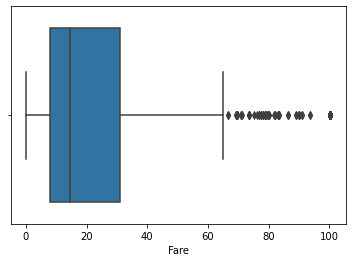

In [32]:
sns.boxplot(data.Fare)

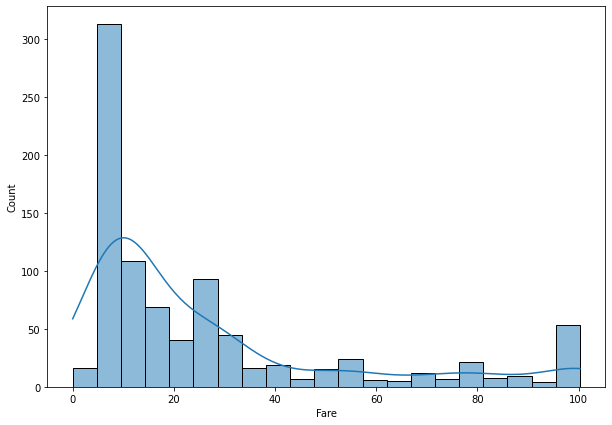

In [33]:
figure = plt.figure(figsize=(10,7))
figure = sns.histplot(data.Fare, kde=True)

In [34]:
data[['Age', 'Fare']].isnull().sum()

Age     0
Fare    0
dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train, x_test, y_train, y_test = train_test_split(data[['Age', 'Fare']], data.Survived, test_size=0.20, random_state=30)

In [37]:
x_train

,Age,Fare
199,24.0,13.0000
703,25.0,7.7417
823,27.0,12.4750
236,44.0,26.0000
679,36.0,100.2688
...,...,...
140,73.0,15.2458
500,17.0,8.6625
813,6.0,31.2750
421,21.0,7.7333


In [38]:
x_test

,Age,Fare
417,18.0,13.0000
307,17.0,100.2688
87,73.0,8.0500
577,39.0,55.9000
684,60.0,39.0000
...,...,...
368,73.0,7.7500
851,73.0,7.7750
501,21.0,7.7500
520,30.0,93.5000


In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lor = LogisticRegression()

In [41]:
lor.fit(x_train, y_train)
y_pred = lor.predict(x_test)
y_pred1 = lor.predict_proba(x_test)

In [42]:
from sklearn.metrics import accuracy_score, roc_auc_score

In [43]:
accuracy_score(y_test, y_pred)

0.6536312849162011

In [44]:
roc_auc_score(y_test, y_pred)

0.5971570161711006

In [45]:
y_pred1[:,1]

array([0.34017934, 0.8328746 , 0.20152103, 0.55568103, 0.39234777,
       0.28152707, 0.82532407, 0.30296753, 0.20027492, 0.20037854,
       0.38322538, 0.33926322, 0.29861426, 0.30818331, 0.66011264,
       0.29851969, 0.29710927, 0.20408316, 0.28244384, 0.30848301,
       0.32347697, 0.28828306, 0.3658703 , 0.55871397, 0.5483091 ,
       0.25737435, 0.39342842, 0.2984788 , 0.22971363, 0.28881422,
       0.7270601 , 0.35814772, 0.19698022, 0.55340138, 0.20087981,
       0.26978641, 0.33677262, 0.83138566, 0.28639896, 0.22952277,
       0.35848366, 0.17007457, 0.20027492, 0.45486205, 0.31882941,
       0.25569137, 0.46118029, 0.30212565, 0.37207456, 0.27821959,
       0.74128404, 0.30727759, 0.28651977, 0.74636977, 0.45512549,
       0.39149783, 0.20060333, 0.29861426, 0.39710646, 0.29836673,
       0.84158817, 0.59768519, 0.52657565, 0.20152103, 0.20087981,
       0.29321258, 0.53951771, 0.75335882, 0.37709186, 0.37566916,
       0.30868047, 0.20087981, 0.32347697, 0.27682878, 0.31735

In [46]:
roc_auc_score(y_test,y_pred1[:,1])

0.7022039645279081

In [47]:
roc_auc_score(y_test,y_pred1[:,0])

0.2977960354720918

In [48]:
get_ipython().run_line_magic('matplotlib', 'inline')

In [49]:
dataset=[11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10,5000,5001]

# outlier detection

In [50]:
outlier = []
def outlier_detect(data):
    mean = np.mean(data)
    standard_deviation = np.std(data)
    for i in dataset:
        if i>=mean+3*standard_deviation:
            outlier.append(i)
    return outlier
            
    
    

In [51]:
outlier_detect(dataset)

[5000, 5001]

In [52]:
outlier = []

def outlier_def(data):
    threshold = 3
    mean = np.mean(data)
    standard = np.std(data)
    
    for i in data:
        z = (i - mean)/standard
        if np.abs(z)>3:
            outlier.append(z)
            
    return(z)
    

In [53]:
outlier_def(dataset)

4.122503332024873

In [54]:
sorted(dataset)
lower, upper = np.percentile(dataset, [25,75])

In [55]:
upper

15.0

In [56]:
lower

12.0

In [57]:
from numpy.random import randn
from numpy.random import seed

data = randn(1000)

In [58]:
random_data = 5*data+50

In [59]:
np.mean(random_data)

50.01902896542406

In [60]:
np.std(random_data)

4.979171540316503

In [61]:
upper = np.mean(random_data)+3*np.std(random_data)

In [62]:
lower = np.mean(random_data)-3*np.std(random_data)

In [63]:
outliers = [x for x in random_data if x>upper or x<lower]
len(outliers)

4

In [64]:
# generate gaussian data
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

mean=50.049 stdv=4.994


In [65]:
# calculate summary statistics
data_mean, data_std = mean(data), std(data)
# define outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

In [66]:
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 29


In [67]:
data = 5 * randn(10000) + 50

In [68]:
data

array([49.38763047, 51.14084909, 48.23847435, ..., 62.04216899,
       54.41392775, 49.50201845])

In [69]:
mean = mean(data)
mean

50.04717706723551

In [70]:
standard = std(data)
standard

5.005946365868043

In [71]:
upper_limit = mean+3*standard
upper_limit

65.06501616483963

In [72]:
lower_limit = mean-3*standard
lower_limit

35.02933796963138

In [73]:
outlier = []
def out(data):
    for i in data:
        if i < lower_limit or i > upper_limit:
            outlier.append(i)
            
    return outlier

In [74]:
out(data)

[33.589606018446915,
 67.80306323836209,
 34.132691813291274,
 65.53374664286396,
 65.72684481848727,
 33.44578718897701,
 34.51086724037783,
 33.59836201472855,
 65.13109247152178,
 34.17394937661556,
 34.43684168906787,
 65.39803886537827,
 70.84058838977548,
 69.17190510455352,
 34.853280110384304,
 32.82037094997793,
 33.70396965680177,
 65.38539527110383,
 66.13968060176973,
 34.807787070206146,
 33.97967774826937,
 34.48917553152967,
 66.92857577965574,
 67.23478007894843,
 34.86971671326636,
 32.74298546872413]

In [75]:
from numpy import percentile
from numpy import quantile

In [76]:
lower = percentile(data, 25)

In [77]:
quantile(data, 0.25)

46.63852803347012

In [78]:
upper = percentile(data, 75)

In [79]:
quantile(data, 0.75)

53.44341692795445

In [80]:
inter = upper - lower
inter

6.804888894484328

In [81]:
lower - 1.5*inter

36.43119469174363

In [82]:
upper - 1.5*inter

43.23608358622796

In [83]:
out = [x for x in data if x < lower - 1.5*inter or x > upper - 1.5*inter]

In [84]:
len(out)

9164